In [55]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print(sys.executable)
sys.path.append("../src")
from cleaning import load_data,data_taste


c:\Users\Mega Pc\OneDrive\Desktop\Survey mini project\venv\Scripts\python.exe


In [10]:
df = pd.read_excel("../data/Survey.xlsx")
print(df.head())

   ID          Start time     Completion time      Email  Name  \
0   1 2025-12-14 21:23:50 2025-12-14 21:26:45  anonymous   NaN   
1   2 2025-12-14 21:21:21 2025-12-14 21:28:25  anonymous   NaN   
2   3 2025-12-14 21:22:50 2025-12-14 21:38:59  anonymous   NaN   
3   4 2025-12-14 21:38:14 2025-12-14 21:42:01  anonymous   NaN   
4   5 2025-12-14 21:22:49 2025-12-14 21:44:35  anonymous   NaN   

   Last modified time  Age Gender marital_status marriage_planning  ...  \
0                 NaN   27    Man             No               Yes  ...   
1                 NaN   22  Woman             No               Yes  ...   
2                 NaN   34  Woman            Yes               NaN  ...   
3                 NaN   24  Woman             No               Yes  ...   
4                 NaN   31  Woman            Yes               NaN  ...   

  ideal_children_number ideal_age_first_child  \
0                     1                    30   
1                     3                    28   
2    

In [11]:
moyenne_age = df["Age"].mean()
médiane_age = df["Age"].median()
print("La moyenne d'âge des participants est de :", moyenne_age)
print("La médiane d'âge des participants est de :", médiane_age)

La moyenne d'âge des participants est de : 29.1875
La médiane d'âge des participants est de : 26.0


Répartition des genres : Gender
Woman    29
Man      19
Name: count, dtype: int64


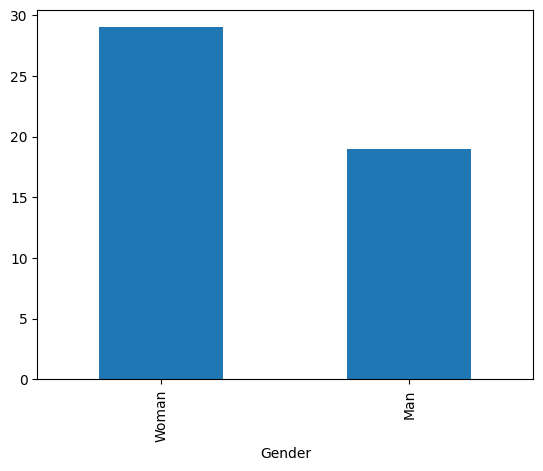

In [12]:
genders_counts = df["Gender"].value_counts()
print("Répartition des genres :", genders_counts)
genders_counts.plot(kind="bar")
plt.show()

<Axes: xlabel='marital_status'>

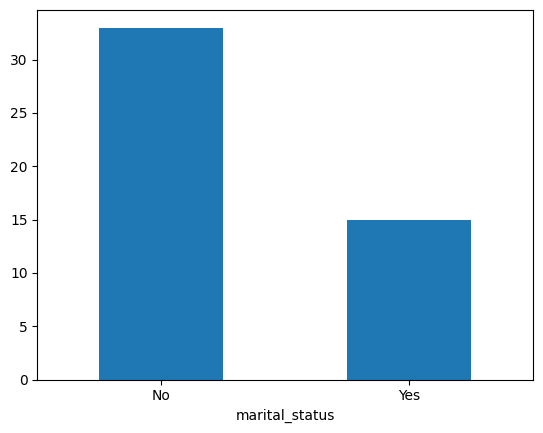

In [13]:
# Calcul du pourcentage de personnes mariées vs non mariées
marital_status = df["marital_status"].value_counts()
marital_status.plot(kind="bar", rot =0)

Text(0.5, 1.0, 'Quel est le pourcentage de femmes mariées ?')

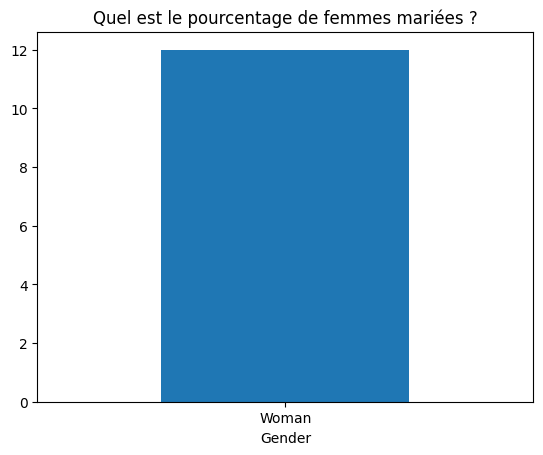

In [14]:
#Quel est le pourcentage de femmes mariées ?
married_women = df[(df["Gender"] == "Woman")&(df["marital_status"] == "Yes")]
married_women_count=married_women["Gender"].value_counts()
married_women_count.plot(kind="bar",rot=0)
plt.title("Quel est le pourcentage de femmes mariées ?")

<Axes: xlabel='Gender'>

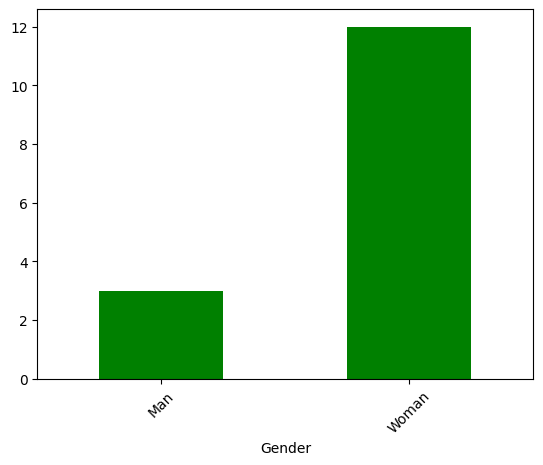

In [15]:
#Pourcentage de femmes mariées vs Pourcentages des hommes mariés ?
gender_comparison = df[df["marital_status"] == "Yes"].groupby("Gender")
gender_comparison_count = gender_comparison["Gender"].value_counts()
gender_comparison_count.plot(kind = "bar",rot = 45,color = "green")

<Axes: xlabel='household_chores'>

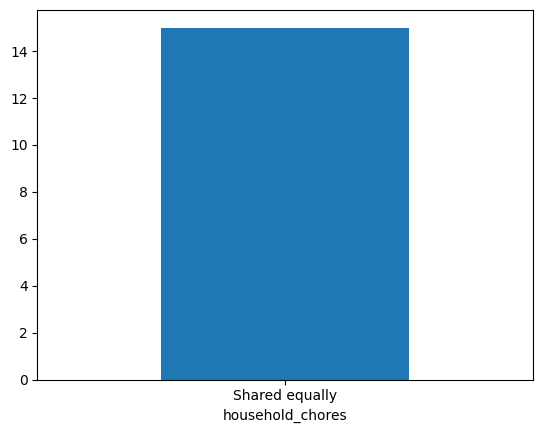

In [16]:
#Pourcentage de ceux qui pensent que les tâches ménagères doivent être partagées équitablement ?
shared_chores = df[df["household_chores"] == "Shared equally"]
shared_chores_count= shared_chores["household_chores"].value_counts()
shared_chores_count.plot(kind="bar",rot = 0)

<Axes: xlabel='household_chores'>

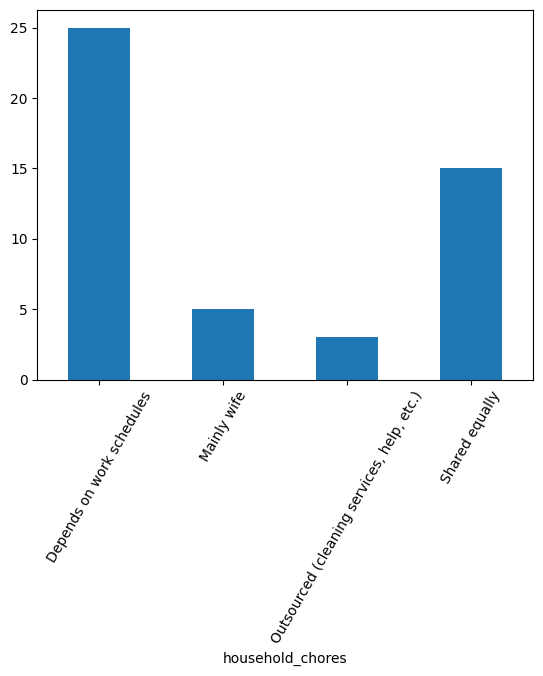

In [24]:
#Pourcentage des differentes perspectives sur les taches menagères
chores_comparison = df.groupby("household_chores")
chores_comparison_count = chores_comparison["household_chores"].value_counts()
chores_comparison_count.plot(kind="bar",rot = 60)

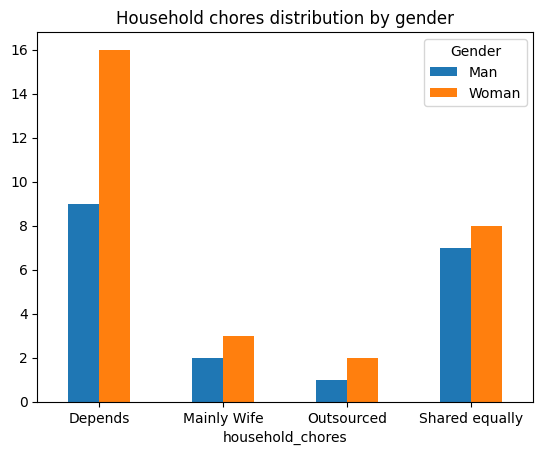

In [ ]:
fig, ax =plt.subplots()
chores_by_gender = df.groupby(["household_chores","Gender"]).size().unstack(fill_value=0)
chores_by_gender.plot(kind="bar",ax = ax,rot = 0)
custom_labels = ["Depends", "Mainly Wife", "Outsourced", "Shared equally"]
ax.set_xticklabels(custom_labels)
ax.set_title("Household chores distribution by gender")
plt.show()

Text(0.5, 1.0, 'Comparaison de l’importance moyenne du mariage (1–5) entre hommes et femmes')

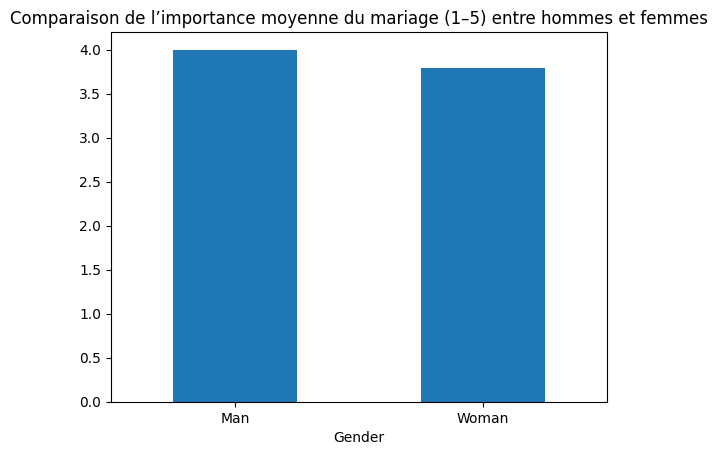

In [ ]:
#Comparaison de l’importance moyenne du mariage (1–5) entre hommes et femmes.
marriage_importance = df.groupby("Gender")["marriage_importance"].mean()
marriage_importance.plot(kind="bar",rot = 0)
plt.title("Comparaison de l’importance moyenne du mariage (1–5) entre hommes et femmes")


Text(0.5, 1.0, "les femmes mariées qui pensent partager equitablement les 'house chores'")

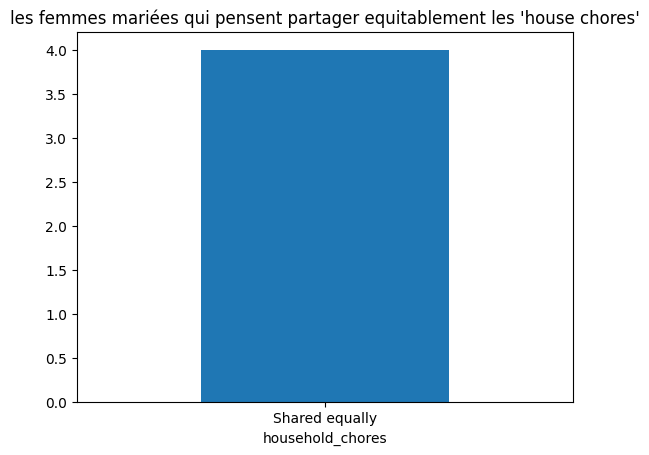

In [ ]:
#Parmi les femmes mariées, le pourcentage de ceux qui pensent que les tâches ménagères doivent être partagées équitablement
shared_equally = df[(df["marital_status"] == "Yes") & (df["Gender"] == "Woman") & (df["household_chores"] == "Shared equally")]
shared_equally_count = shared_equally["household_chores"].value_counts()
shared_equally_count.plot(kind = "bar", rot = 0)
plt.title("les femmes mariées qui pensent partager equitablement les 'house chores'")

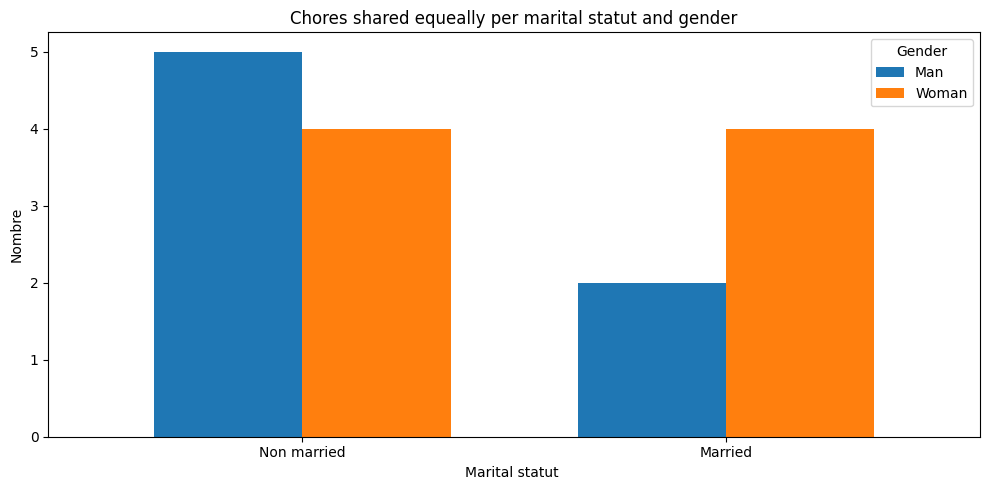

In [ ]:
#vs femmes non mariées - deux groupes dans une seule figure
fig, ax = plt.subplots(figsize=(10, 5))

# Grouper par marital_status et Gender, puis compter ceux qui pensent "Shared equally"
chores_data = df[df["household_chores"] == "Shared equally"].groupby(["marital_status", "Gender"]).size().unstack(fill_value=0)

# Créer le bar chart groupé
chores_data.plot(kind="bar", ax=ax, rot=0, width=0.7)

ax.set_title("Chores shared equeally per marital statut and gender")
ax.set_ylabel("Number")
ax.set_xlabel("Marital statut ")
ax.set_xticklabels(['Non married', 'Married'], rotation=0)

plt.legend(title="Gender")
plt.tight_layout()
plt.show()

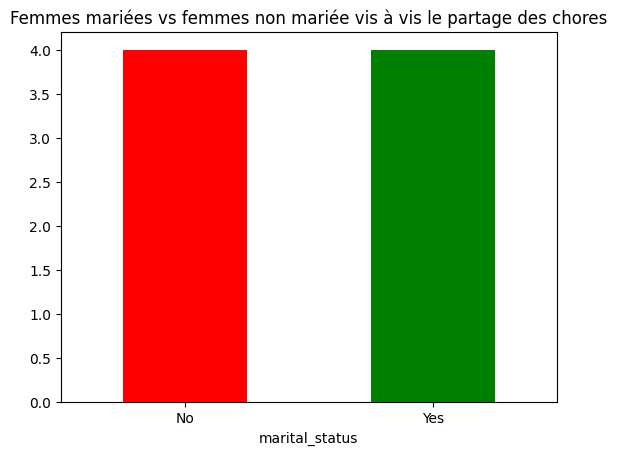

In [47]:
#Femmes mariées vs femmes non mariée
fig, ax = plt.subplots()
f_comp = df[(df["Gender"] == "Woman") & (df["household_chores"] == "Shared equally")].groupby("marital_status").size()
f_comp.plot(kind = "bar",ax = ax, rot = 0,color = ("r","g"))
plt.title("Femmes mariées vs femmes non mariée vis à vis le partage des chores")
plt.show()

[Text(0, 0, 'Flexible'),
 Text(1, 0, 'Husband'),
 Text(2, 0, 'One provider'),
 Text(3, 0, 'Split bills')]

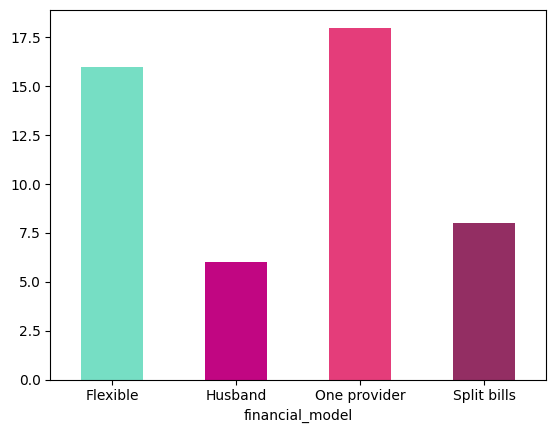

In [ ]:
#Quel est le modèle financier le plus choisi globalement ?
fig, ax = plt.subplots()
colors = np.random.rand(len(fin_model), 3)
fin_model = df.groupby("financial_model").size()
cust_labs = ["Flexible","Husband","One provider","Split bills"]
fin_model.plot(kind = "bar", ax = ax, rot =0,color = colors)
ax.set_xticklabels(cust_labs, rotation=0)

[Text(0, 0, 'Flexible'),
 Text(1, 0, 'Husband'),
 Text(2, 0, 'One provider'),
 Text(3, 0, 'Split bills')]

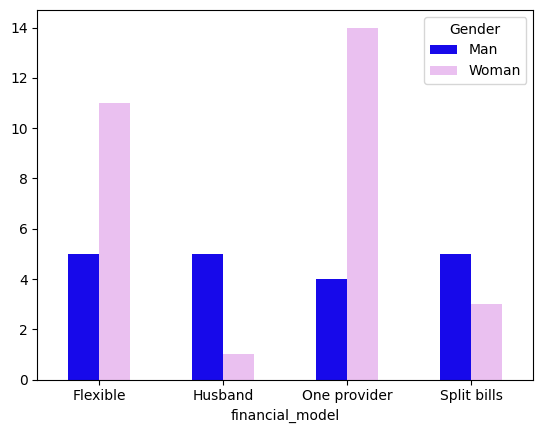

In [62]:
#Quel est le modèle financier le plus choisi globalement  selon le gender?
fig, ax = plt.subplots()
colors = np.random.rand(len(fin_model), 3)
fin_model = df.groupby(["financial_model","Gender"]).size().unstack(fill_value = 0)
cust_labs = ["Flexible","Husband","One provider","Split bills"]
fin_model.plot(kind = "bar", ax = ax, rot =0,color = colors)
ax.set_xticklabels(cust_labs, rotation=0)